In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['NUMBA_DISABLE_JIT'] = '1'

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np

from PySDM.dynamics.collisions.coalescence_efficiencies import ConstEc, Straub2010Ec, LowList1982Ec
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, AlwaysN, Straub2010Nf, LowList1982Nf
from PySDM.physics.constants import si
from PySDM.initialisation.spectra import Exponential

finished ll82
[[     0.              0.              0.              0.        ]
 [208891.03583333      0.         144846.22083333  54800.36583333]
 [ 50523.89916667      0.          17738.195       31818.39291667]]


Text(0.5, 1.0, 't = 200sec')

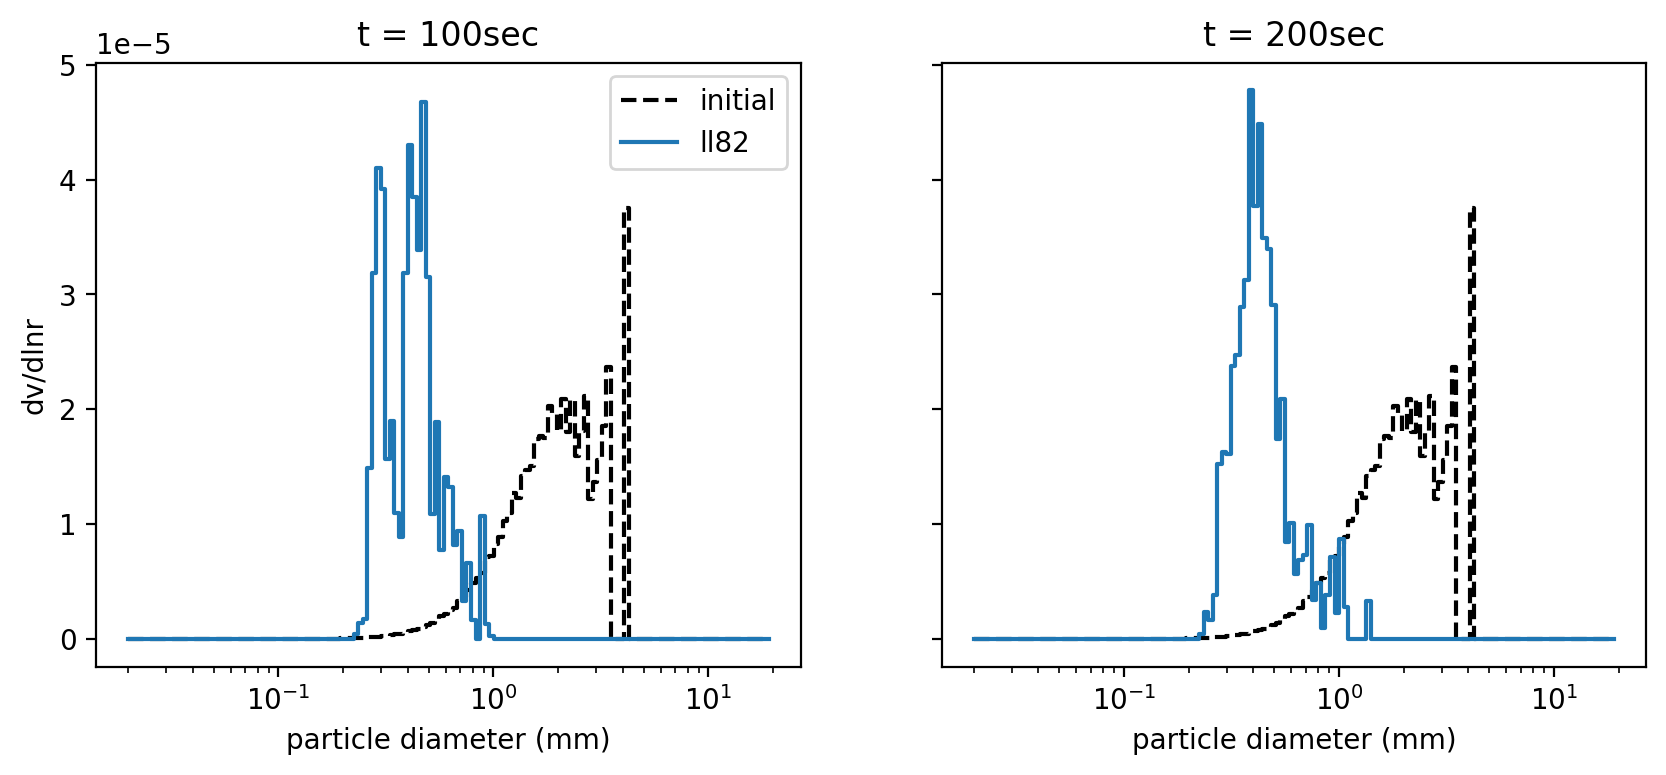

In [5]:
rain_rate = 54 * si.mm / si.h
mp_scale = 4.1 / si.mm * (rain_rate / si.mm * si.h)**(-0.21)
mp_N0 = 80000 / si.m**3 / si.mm # factor of 10 seems necessary?
n_part = mp_N0 / mp_scale

#settings = Settings0D(AlwaysN(n = 3))
settings = Settings0D(fragmentation=LowList1982Nf(vmin = 5.24e-13))
settings.coal_eff = LowList1982Ec()
#settings.coal_eff = ConstEc(Ec = 0.5)
settings.dv = 1 * si.m**3
settings.spectrum = Exponential(norm_factor=n_part * settings.dv, scale=1 / mp_scale)

settings.n_sd = 2**10
settings.radius_bins_edges = np.logspace(
    np.log10(0.01 * si.mm), np.log10(10 * si.mm), num=144, endpoint=True
)

settings.warn_overflows = True
settings._steps = [0, 1200, 3600]  # pylint: disable=protected-access
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

(x,y,rates) = run_box_breakup(settings, [0], sample_in_radius=True)#, return_nv=True)
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(2*x/1000, y[0], color='k', linestyle='--', label='initial')
ax[1].step(2*x/1000, y[0], color='k', linestyle='--', label='initial')

(x,y,rates) = run_box_breakup(settings, sample_in_radius=True)#, return_nv=True)
print("finished ll82")
for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
    if j == 0:
        continue
    lbl = 'll82'
    ax[j-1].step(2*x/1000,y[j],#linestyle='--',
            label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle diameter (mm)")
ax[1].set_xlabel("particle diameter (mm)")
ax[0].set_ylabel("dv/dlnr")
ax[0].legend()
ax[0].set_title("t = 100sec")
ax[1].set_title("t = 200sec")
#show_plot('fig3_Ec_sensitivity.pdf')